In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Convolution2D,MaxPool2D,Dense,Input,Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()
X_train = (X_train / 255).reshape((-1,784))
X_test = (X_test / 255).reshape((-1,784))
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [3]:
encoding_dim = 2

encoding_dim = min(encoding_dim,8)
#placeholder
input_img = Input(shape=(784,))

#encoder layers
#encoder = Flatten()(input_img)
encoder = Dense(128,activation='relu')(input_img)
encoder = Dense(64,activation='relu')(encoder)
encoder = Dense(16,activation='relu')(encoder)
encoder = Dense(encoding_dim)(encoder)

#decoder
decoder = Dense(16,activation='relu')(encoder)
decoder = Dense(64,activation='relu')(decoder)
decoder = Dense(128,activation='relu')(decoder)
decoder = Dense(784,activation='sigmoid')(decoder)

#model auto_encoder
auto_encoder = Model(inputs=input_img,outputs=decoder)
#
encoder_model = Model(inputs=input_img,outputs=encoder)
#compile
auto_encoder.compile(Adam(),tf.losses.mean_squared_error)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [4]:
auto_encoder.fit(X_train,X_train,64,20,shuffle=True)

Epoch 1/20
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0577
Epoch 2/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0460
Epoch 3/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0433
Epoch 4/20
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0417
Epoch 5/20
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0406
Epoch 6/20
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0398
Epoch 7/20
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0392
Epoch 8/20
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0387
Epoch 9/20
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0383
Epoch 10/20
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0379
Epoch 11/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0376
Epoch 12/20
60000/60000 [=====

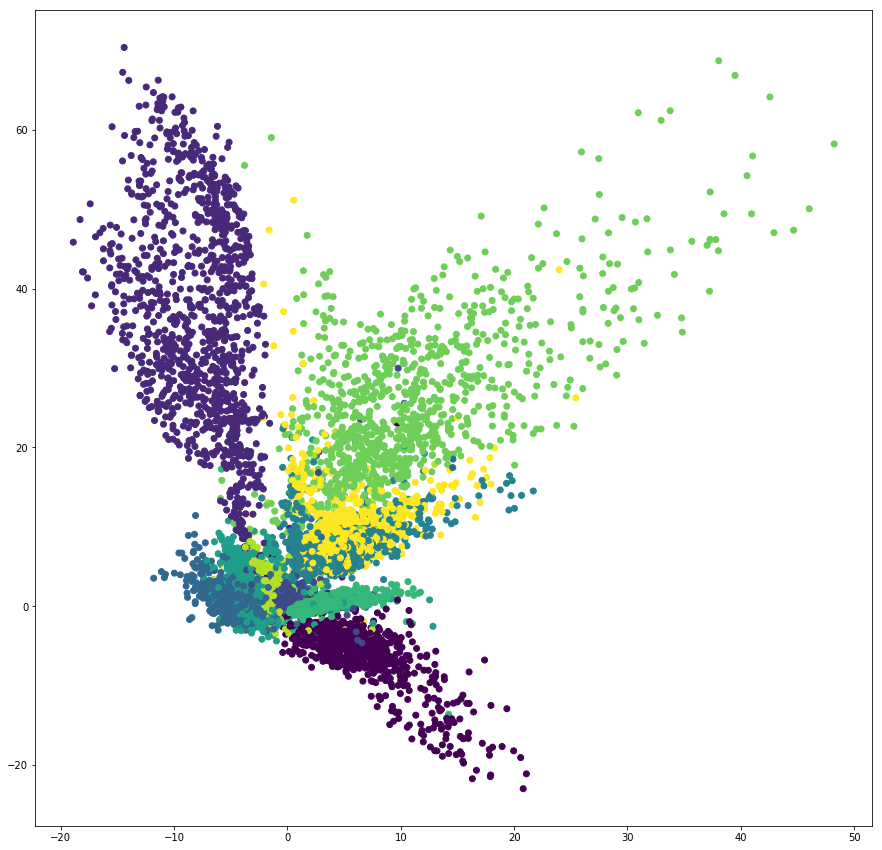

In [5]:
encoded_imgs = encoder_model.predict(X_test)
plt.figure(figsize=(15,15))
plt.scatter(encoded_imgs[:,0],encoded_imgs[:,1],c=Y_test)
plt.show()

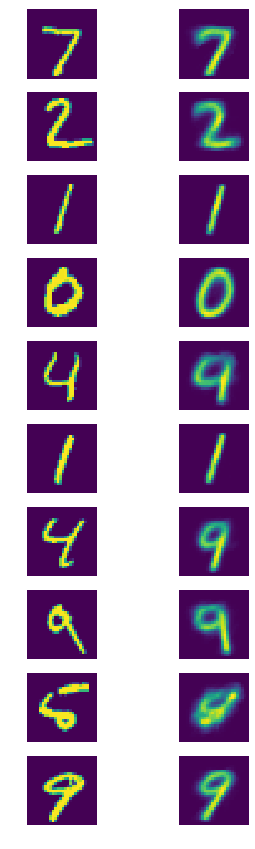

In [10]:
#sample test
SAMPLE_COUNT = 10
plt.figure(figsize=(5,15))
for index in range(SAMPLE_COUNT):
    data_image = X_test[index]
    image_origin = data_image.reshape(28,28)
    ax = plt.subplot(SAMPLE_COUNT,2,index * 2 + 1)
    ax.imshow(image_origin)
    ax.axis("off")
    image_coder = auto_encoder.predict(data_image[None,...]).reshape(28,28)
    ax = plt.subplot(SAMPLE_COUNT,2,index * 2 + 2)
    ax.imshow(image_coder)
    ax.axis("off")
plt.show()
